# Alarm Analysis ver 16.50 vs. ver. 16.20

*Aviad Baram*

With the release of software version 16.50, we expect a reduction in the number of alarms triggered during infusion treatments. This notebook aims to compare the content and distribution of alarms, as well as the rate of failed infusion treatments, between versions 16.20 and 16.50.


## Setup

1. Import required modules
2. Import raw data as pandas DataFrame


In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import os

Fetch env variables

In [2]:
data_path = os.getenv('SHARED_DATA_PATH')  # env variable for data storage
treatment_data_path = os.path.join(data_path, r'alarm_analysis\all_treatments_20231005-20250624.csv')
version_data_path = os.path.join(data_path, r'alarm_analysis\version_history.csv')

In [6]:
treatment_df = pd.read_csv(treatment_data_path)
display(treatment_df)
treatment_df.isna().sum()

C:\Users\aviad.baram\AppData\Local\Temp\ipykernel_6992\3868566371.py:1: DtypeWarning: Columns (2,25) have mixed types. Specify dtype option on import or set low_memory=False.
  treatment_df = pd.read_csv(treatment_data_path)


accountProviderID                  treatment_identifier  \
0       Quantify Remote Care    300361744_987_2024-11-21T15:13:25Z   
1       Quantify Remote Care    300361744_995_2024-11-21T15:17:42Z   
2       Quantify Remote Care   300361744_1002_2024-11-21T15:18:08Z   
3       Quantify Remote Care   300361744_1009_2024-11-21T15:18:33Z   
4       Quantify Remote Care   300386779_1011_2024-11-22T20:49:35Z   
...                      ...                                   ...   
190081       Wellcell-Global  300435358_42415_2025-06-24T15:09:52Z   
190082       Wellcell-Global  300362729_39274_2025-06-24T15:12:47Z   
190083       Wellcell-Global   300433966_9519_2025-06-24T15:16:18Z   
190084       Wellcell-Global   300446142_3285_2025-06-24T15:17:43Z   
190085       Wellcell-Global   300446304_6407_2025-06-24T15:23:46Z   

       serialNumber softwareVersion             softwareUpdateTime  \
0         300361744        16.20.12  2025-01-11 23:39:40.770158+00   
1         300361744        16.20.12  2025-01-11 23:39:40.770158+00   
2         300361744        16.20.12  2025-01-11 23:39:40.770158+00   
3         300361744        16.20.12  2025-01-11 23:39:40.770158+00   
4         300386779        16.20.12  2024-11-22 14:50:07.336146+00   
...             ...             ...                            ...   
190081    300435358        16.20.12      2025-05-25 11:13:50.72+00   
190082    300362729        16.20.12      2025-05-25 10:59:00.53+00   
190083    300433966        16.20.12     2025-05-25 11:30:14.226+00   
190084    300446142        16.50.12     2025-06-06 14:24:26.458+00   
190085    300446304        16.50.12     2025-06-06 19:35:37.916+00   

       treatment_status               startTime                 endTime  \
0             Completed  2024-11-21 15:13:25+00  2024-11-21 15:16:27+00   
1             Completed  2024-11-21 15:17:42+00  2024-11-21 15:17:50+00   
2             Completed  2024-11-21 15:18:08+00  2024-11-21 15:18:15+00   
3             Completed  2024-11-21 15:18:33+00  2024-11-21 15:18:48+00   
4             Completed  2024-11-22 20:49:35+00  2024-11-22 21:19:45+00   
...                 ...                     ...                     ...   
190081          Ongoing  2025-06-24 15:09:52+00                     NaN   
190082          Ongoing  2025-06-24 15:12:47+00                     NaN   
190083          Ongoing  2025-06-24 15:16:18+00                     NaN   
190084          Ongoing  2025-06-24 15:17:43+00                     NaN   
190085          Ongoing  2025-06-24 15:23:46+00                     NaN   

        duration  treatmentdrug  ...  alarm_40_0_0_0  all_alarm_codes  \
0       00:03:02            NaN  ...               1         40.0.0.0   
1       00:00:08            NaN  ...               0              NaN   
2       00:00:07            NaN  ...               0              NaN   
3       00:00:15            NaN  ...               0              NaN   
4       00:30:10            NaN  ...               0              NaN   
...          ...            ...  ...             ...              ...   
190081       NaN            NaN  ...               0              NaN   
190082       NaN            NaN  ...               0              NaN   
190083       NaN            NaN  ...               0          7.0.0.0   
190084       NaN            NaN  ...               0              NaN   
190085       NaN            NaN  ...               0              NaN   

         Version Update Date  Before/After  Start Date  startTime.1  \
0            NaN         NaN           NaN  11/21/2024    7/16/1905   
1            NaN         NaN           NaN  11/21/2024         2024   
2            NaN         NaN           NaN  11/21/2024         2024   
3            NaN         NaN           NaN  11/21/2024         2024   
4            NaN         NaN           NaN  11/22/2024         2024   
...          ...         ...           ...         ...          ...   
190081       NaN         NaN           NaN   6/24/2025

accountProviderID            0
treatment_identifier         0
serialNumber                 0
softwareVersion             12
softwareUpdateTime           0
treatment_status             0
startTime                    0
endTime                    754
duration                   754
treatmentdrug           153448
vi                           0
rate                      1611
vtbiExpected                 0
delivery_mode                0
total_alarms                 0
alarm_7_0_0_0                0
alarm_9_0_0_0                0
alarm_129_0_0_0              0
alarm_12_0_0_0               0
alarm_40_0_0_0               0
all_alarm_codes         130251
Version                 109320
Update Date             109320
Before/After            109320
Start Date                   0
startTime.1                  0
Unnamed: 26                  0
Unnamed: 27                  0
Unnamed: 28                  0
dtype: int64

* get the number of treatment, the distribution of treatments according to type according to version
For each serial find the the update time and all treatments after that point, do for 16.20 and 16.50

* Get distribution of alarms
* which treatment is considered failed?
* which is success
* What are the columnsin Tzvi's export?

## Preprocessing



define static variables. These are variables that define a valid treatment.

In [ ]:
# static vars


remove infusions which are 
* duplicates (sanity check - max is the number of API scroll calls at data retrievals from elastic).
* have VTBI higher than 3500 ml
* end_date before start_date - sometime results from system time reset (e.g battery replacement in SAPPHIRE)


In [ ]:
df = df.sort_values(by='start_date')

raw_infusion_count = len(df.index)
print(f'Total raw infusions:\t{raw_infusion_count}')

dup_count = df.duplicated(subset=['start_date', 'pump_sn'], keep='first').sum()
df.drop_duplicates(subset=['start_date', 'pump_sn'], keep='first', inplace=True)
print(f'Duplicated infusions:\t{dup_count} ({100 * dup_count/raw_infusion_count:.2f}%)')
negative_duration_idx = df[df['end_date'] <= df['start_date']].index
neg_dur_count = len(negative_duration_idx)
print(f'Reversed duration infusions:\t{neg_dur_count} ({100 * neg_dur_count/raw_infusion_count:.2f}%)')

df = df[~df.index.isin(negative_duration_idx)]
infusions_lg_3500_idx = df[df['vtbi_expected']>3500].index
lg3500_count = len(infusions_lg_3500_idx)
print(f'VTBI > 3500 ml infusions:\t{lg3500_count} ({100 * lg3500_count/raw_infusion_count:.2f}%)')

df = df[~df.index.isin(infusions_lg_3500_idx)]
raw_infusion_count = len(df.index)
print(f'Total infusions:\t{len(df.index)} {100 * len(df.index)/raw_infusion_count:.2f}% recovery')


Total raw infusions:	1542296
Duplicated infusions:	115 (0.01%)
Reversed duration infusions:	497 (0.03%)
VTBI > 3500 ml infusions:	28996 (1.88%)
Total infusions:	1512688 100.00% recovery


## Exploratory Data Analysis

Group into patient treatments by:
1. Consecutive infusion treatments
2. Same pump serial number
3. `preset_program` set to `Repeat Last Infusion` AND/OR
4. `expected_vtbi` within `vtbi_tolerance` of previous `expected_vtbi`


In [6]:
patient_labels = pd.Series(index=df.index, dtype=int)
grouped = df.groupby('pump_sn')
patients = 0
# Define function to process each group
start_time = time.time()
for pump_sn, group in grouped:
    patients += 1
    group = group.sort_values(by='start_date')
    indices = group.index.tolist()
    # Start with the first row of the group
    patient_labels[indices[0]] = patients
    for i in range(1, len(indices)):
        prev_idx = indices[i - 1]
        curr_idx = indices[i]
        repeat_infusion = df.loc[curr_idx, 'preset_program'] == 'Repeat Last Infusion'
        same_vtbi = abs(df.loc[curr_idx, 'vtbi_expected'] - df.loc[prev_idx, 'vtbi_expected']) <= vtbi_tolerance # type: ignore
        # initialize new treatment if NOT repeated infusion and NOT the same vtbi (up to tolerance)
        if not repeat_infusion and not same_vtbi:
            patients += 1
        # assign patient value to current treatment
        patient_labels[curr_idx] = patients

# Assign to original DataFrame
df['patient'] = patient_labels
print(f'Total patients:\t{patients}')
end_time_patient = time.time()
print(f"Elapsed time for patient grouping: {end_time_patient - start_time:.2f} seconds")


Total patients:	204653
Elapsed time for patient grouping: 34.55 seconds


Calculate treatment duration

In [7]:
# calculate duration
start_time = time.time()
duration = df.groupby('patient').apply(
    lambda g: pd.Series({'duration': g['start_date'].iloc[-1] - g['start_date'].iloc[0],
                         'country': g['country'].mode().iloc[0]}), include_groups=False).reset_index()
duration['days'] = duration['duration'].dt.days
end_time = time.time()
print(f"Elapsed time for duration calculation: {end_time - start_time:.2f} seconds")

Elapsed time for duration calculation: 43.31 seconds


filter treatments episodes which are longer than 365 days or shorter than 14 days

In [8]:
over_365 = (duration['duration'] > pd.Timedelta(days=365)).sum()
print(f'Treatments with recorded duration > 365 days: {over_365}')
under_14 = (duration['duration'] < pd.Timedelta(days=14)).sum()
print(f'Treatments with recorded duration < 14 days: {under_14}')
all_treatments = len(df.index)
duration = duration[(duration['duration'] >= pd.Timedelta(days=treatment_range[0])) & (duration['duration'] <= pd.Timedelta(days=treatment_range[1]))]
print(f'Total Treatments:\t{len(duration.index)} ({100 * len(duration.index)/patients:.2f}% recovery)')
infusion_count = len(df.index)
df = df[df['patient'].isin(duration['patient'])]
print(f'Total infusions:\t{len(df.index)} ({100 * len(df.index)/infusion_count:.2f}% recovery)')

Treatments with recorded duration > 365 days: 3367
Treatments with recorded duration < 14 days: 177394
Total Treatments:	23892 (11.67% recovery)
Total infusions:	817335 (54.03% recovery)


**Filtering by duration results in the exclusion of ~90% of the identified treatments and ~45% of available infusions**

In [9]:
df_back = df.copy()

In [10]:
df = df.copy()  # suppress modifying a copy warning
# Get the first start_date per patient
df['treatment_start'] = df.groupby('patient')['start_date'].transform('min')
# Calculate week number since first_date
df['treatment_week'] = ((df['start_date'] - df['treatment_start']) // pd.Timedelta(days=7)).astype(int) + 1 # type: ignore
# Get calendar week for each interval start
df['interval_start'] = df['treatment_start'] + (df['treatment_week'] - 1) * pd.Timedelta(days=7)
df['month'] = df['interval_start'].dt.month
df['year'] = df['interval_start'].dt.year
df['day'] = 1

Group and aggregate by treatment week


In [11]:
weekly_summary = df.groupby(['patient', 'treatment_week']).agg(
    year = ('year', 'first'),
    country = ('country', lambda x: x.mode().iloc[0]),
    month = ('month', 'first'),
    max_vtbi=('vtbi_expected', 'max'),
    vi_sum=('vi', 'sum'),
    treatment_count=('start_date', 'count')
).reset_index()
wkly_patient_intvls = len(weekly_summary.index)  #  weekly/patient treatment intervals
print(f'Total weekly/patient treatment intervals:\t{wkly_patient_intvls}')

Total weekly/patient treatment intervals:	165830


Filter treatment weeks with an infusion count higher than the defined threshold (i.e `treatment_freq_threshold`)

In [12]:
high_frequency_weeks = (weekly_summary['treatment_count'] > treatment_freq_threshold).sum()
print(f'Treatment weeks with frequency density > {treatment_freq_threshold}: {high_frequency_weeks}')
weekly_summary = weekly_summary[weekly_summary['treatment_count'] <= treatment_freq_threshold]
print(f'Total weekly/patient treatment intervals:\t{len(weekly_summary.index)} ({100 * len(weekly_summary.index)/wkly_patient_intvls:.2f}% recovery)')
wkly_patient_intvls = len(weekly_summary.index)

Treatment weeks with frequency density > 10: 1408
Total weekly/patient treatment intervals:	164422 (99.15% recovery)


calculate patient adherence

In [13]:
patient_expected_weekly = weekly_summary.groupby('patient')['treatment_count'].transform(lambda x: x.max()).clip(upper=7)
weekly_summary['likely_vtbi'] = patient_expected_weekly
weekly_summary['likely_vtbi'] = weekly_summary['likely_vtbi'] * weekly_summary['max_vtbi']
weekly_summary['adherence_ratio'] = weekly_summary['vi_sum'] / weekly_summary['likely_vtbi']

In [14]:
# filter weekly adherence over 1.1
high_adherence_weeks = (weekly_summary['adherence_ratio'] > int(max_adherence_threshold)).sum()
print(f'Treatment weeks with adherence ratio density > {max_adherence_threshold}: {high_adherence_weeks}')
weekly_summary = weekly_summary[weekly_summary['adherence_ratio'] <= max_adherence_threshold]
print(f'Total weekly/patient treatment intervals:\t{len(weekly_summary.index)} ({100 * len(weekly_summary.index)/wkly_patient_intvls:.2f}% recovery)')
wkly_patient_intvls = len(weekly_summary.index)

Treatment weeks with adherence ratio density > 1.1: 9221
Total weekly/patient treatment intervals:	157746 (95.94% recovery)


In [15]:
# Create a combined 'country' category (show all) for visualizations
weekly_summary_all = weekly_summary.copy()
weekly_summary_all['country'] = 'All' 
weekly_summary = pd.concat([weekly_summary, weekly_summary_all], ignore_index=True)

patient_adherence = weekly_summary.groupby(['year', 'month', 'country']).agg(
    num_vals=('adherence_ratio', 'count'),
    mean_adherence=('adherence_ratio', 'mean')
)
patient_adherence.reset_index(inplace=True)
#  pd.to_datetime(patient_adherence[['calendar_year', 'calendar_month']].assign(day=1))
patient_adherence['month_year'] = pd.to_datetime(patient_adherence[['year', 'month']].assign(day=1))
patient_adherence['month_year_str'] = patient_adherence['month_year'].apply(
    lambda m: m.strftime('%Y-%m') if m.month == 1 else m.strftime('%m')
)

## Visualizations

In [16]:
selected_countries = ['USA', 'France']  #  ['USA', 'France', 'UK', 'Israel', 'Other']
dist_ylims = [0, 1]  # y limits for probability distribution function - overrides auto scaling
sns.set_theme(style="darkgrid")

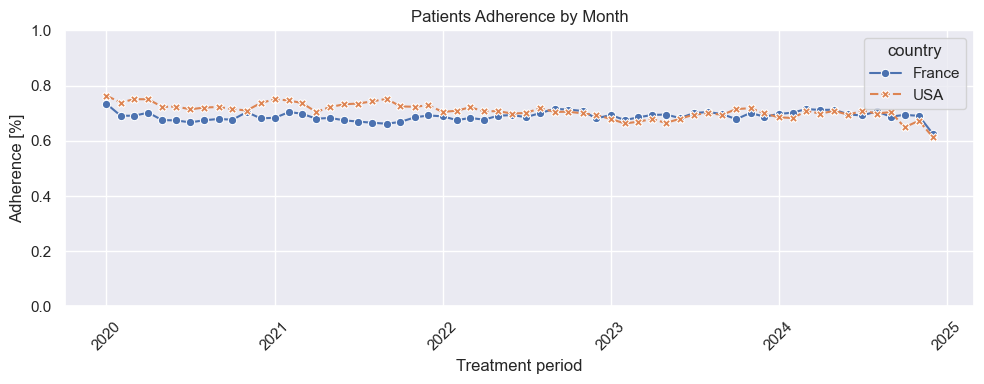

In [17]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=patient_adherence.loc[patient_adherence['country'].isin(selected_countries)],
              x='month_year', y='mean_adherence', hue='country',style='country', markers=True)
plt.title('Patients Adherence by Month')
plt.xlabel('Treatment period')
plt.ylabel('Adherence [%]')
plt.ylim(dist_ylims[0], dist_ylims[1])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
duration.columns

Index(['patient', 'duration', 'country', 'days'], dtype='object')

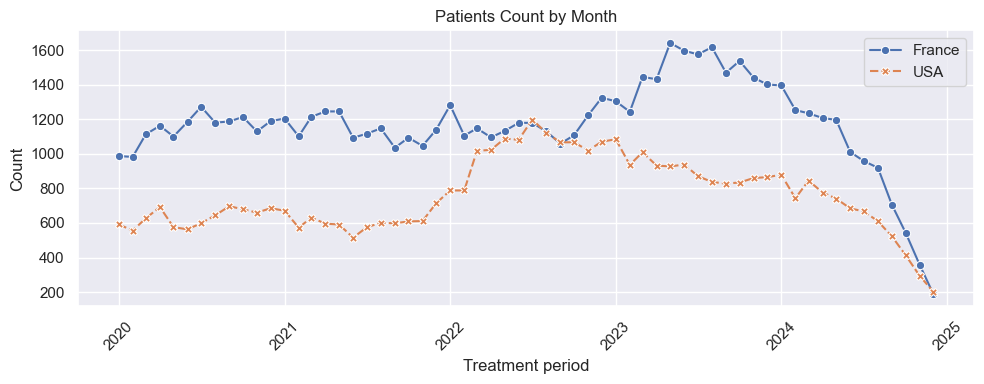

In [19]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=patient_adherence.loc[patient_adherence['country'].isin(selected_countries)],
              x='month_year', y='num_vals', hue='country',style='country', markers=True)
plt.legend()
plt.title('Patients Count by Month')
plt.xlabel('Treatment period')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

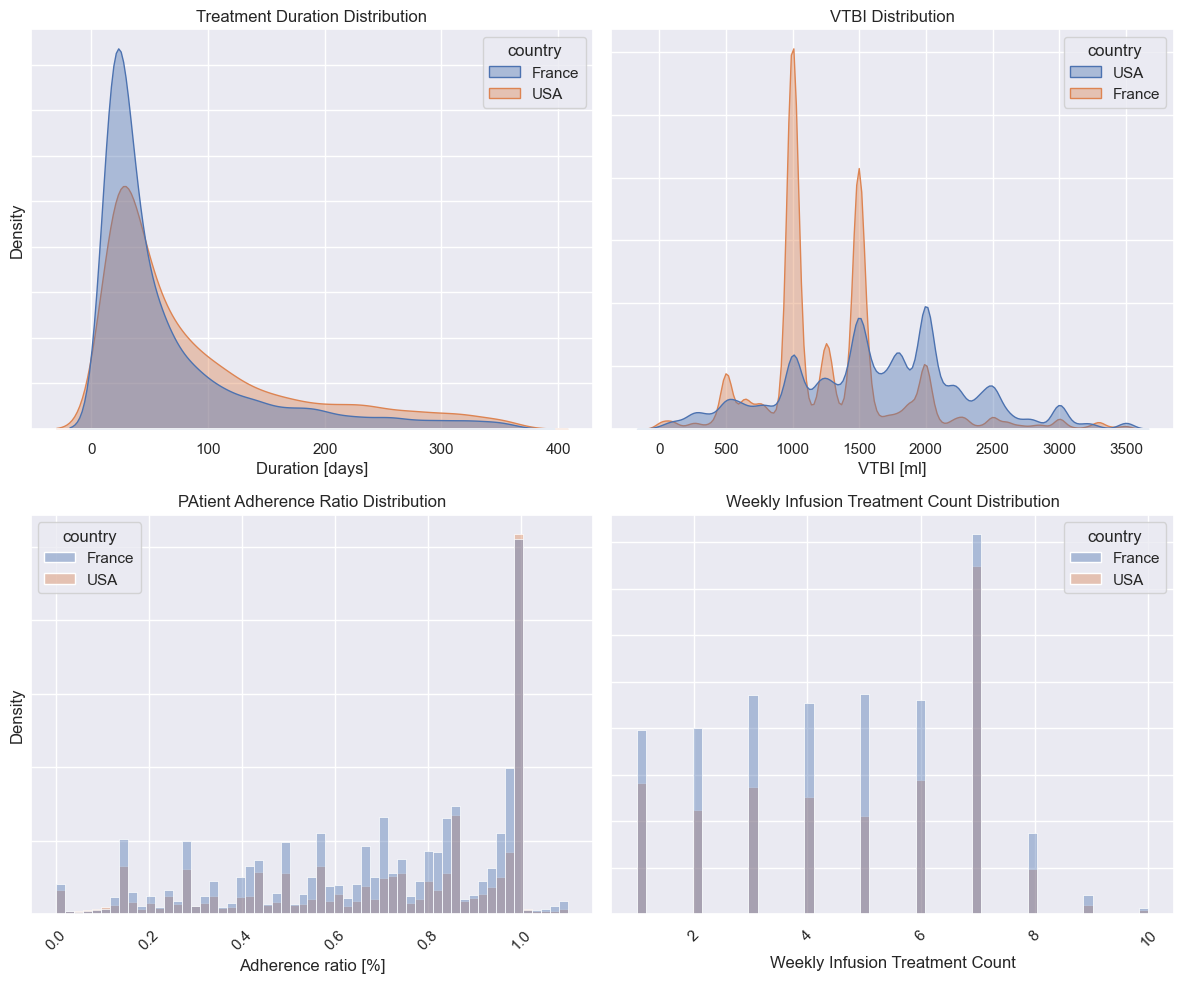

In [20]:
# Create 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns
# Flatten the axes array for easy indexing
axes = axes.flatten()
sns.kdeplot(data=duration[duration['country'].isin(selected_countries)], x='days', hue='country', common_norm=False, fill=True, alpha=0.4,
            ax=axes[0])
axes[0].tick_params(axis='y', left=False, labelleft=False)
axes[0].set_xlabel('Duration [days]')
axes[0].set_title('Treatment Duration Distribution')

sns.kdeplot(data=df[df['country'].isin(selected_countries)], x='vtbi_expected', hue='country', common_norm=False, fill=True, alpha=0.4,
            ax=axes[1])
axes[1].tick_params(axis='y', left=False, labelleft=False)
axes[1].set_ylabel('')
axes[1].set_xlabel('VTBI [ml]')
axes[1].set_title('VTBI Distribution')

sns.histplot(data=weekly_summary[weekly_summary['country'].isin(selected_countries)], x='adherence_ratio', hue='country', stat='density',
             fill=True, alpha=0.4, ax=axes[2])
axes[2].tick_params(axis='y', left=False, labelleft=False)
axes[2].tick_params(axis='x', rotation=45)
axes[2].set_xlabel('Adherence ratio [%]')
axes[2].set_title('PAtient Adherence Ratio Distribution')

sns.histplot(data=weekly_summary[weekly_summary['country'].isin(selected_countries)], x='treatment_count', hue='country', stat='density',
             fill=True, alpha=0.4, ax=axes[3])
axes[3].tick_params(axis='y', left=False, labelleft=False)
axes[3].set_ylabel('')
axes[3].tick_params(axis='x', rotation=45)
axes[3].set_xlabel('Weekly Infusion Treatment Count')
axes[3].set_title('Weekly Infusion Treatment Count Distribution')

plt.tight_layout()
plt.show()
